In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load datasets
cab_data_path = 'Cab_Data.csv'
customer_id_path = 'Customer_ID.csv'
transaction_id_path = 'Transaction_ID.csv'
city_path = 'City.csv'

In [3]:
cab_data = pd.read_csv(cab_data_path)
customer_id = pd.read_csv(customer_id_path)
transaction_id = pd.read_csv(transaction_id_path)
city = pd.read_csv(city_path)

In [4]:
# Convert "Date of Travel" from Excel serial date number to a readable date format
cab_data['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab_data['Date of Travel'], 'D')

In [5]:
# Merge Cab_Data with Transaction_ID on "Transaction ID"
cab_transaction_merged = pd.merge(cab_data, transaction_id, on='Transaction ID')

In [6]:
# Merge the resulting dataset with Customer_ID on "Customer ID"
cab_transaction_customer_merged = pd.merge(cab_transaction_merged, customer_id, on='Customer ID')

In [7]:
# Merge the resulting dataset with City on "City"
master_data = pd.merge(cab_transaction_customer_merged, city, on='City')

In [8]:
# Descriptive statistics
descriptive_stats = master_data.describe()

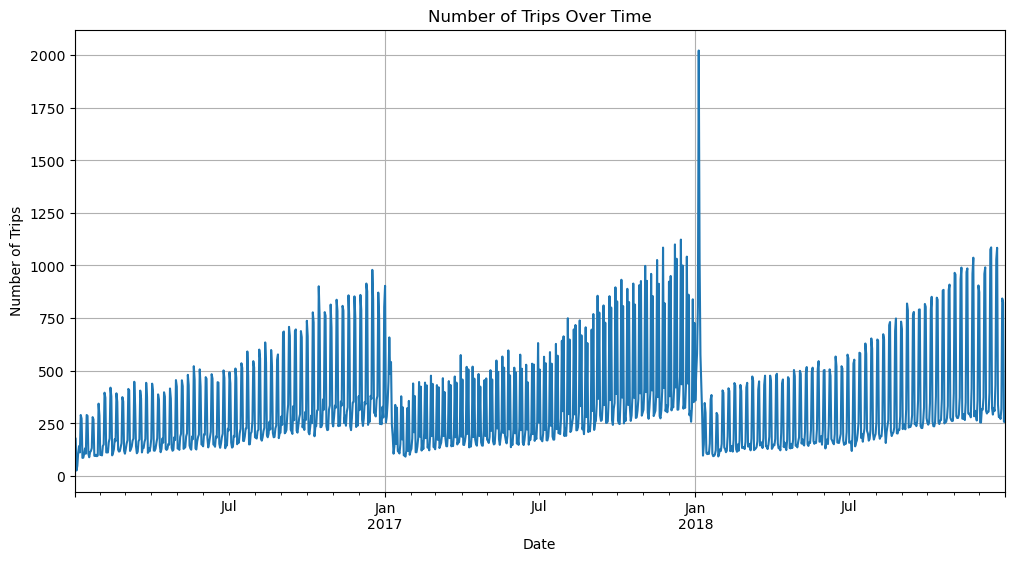

In [9]:
# Plotting number of trips over time
plt.figure(figsize=(12, 6))
master_data['Date of Travel'].value_counts().sort_index().plot()
plt.title('Number of Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

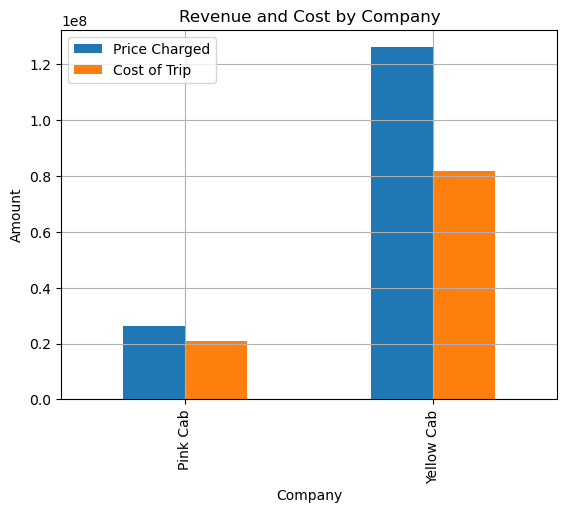

In [35]:
# Revenue and cost analysis by company
plt.figure(figsize=(12, 6))
master_data.groupby('Company')[['Price Charged', 'Cost of Trip']].sum().plot(kind='bar')
plt.title('Revenue and Cost by Company')
plt.xlabel('Company')
plt.ylabel('Amount')
plt.legend(['Price Charged', 'Cost of Trip'])
plt.grid(True)
plt.show()

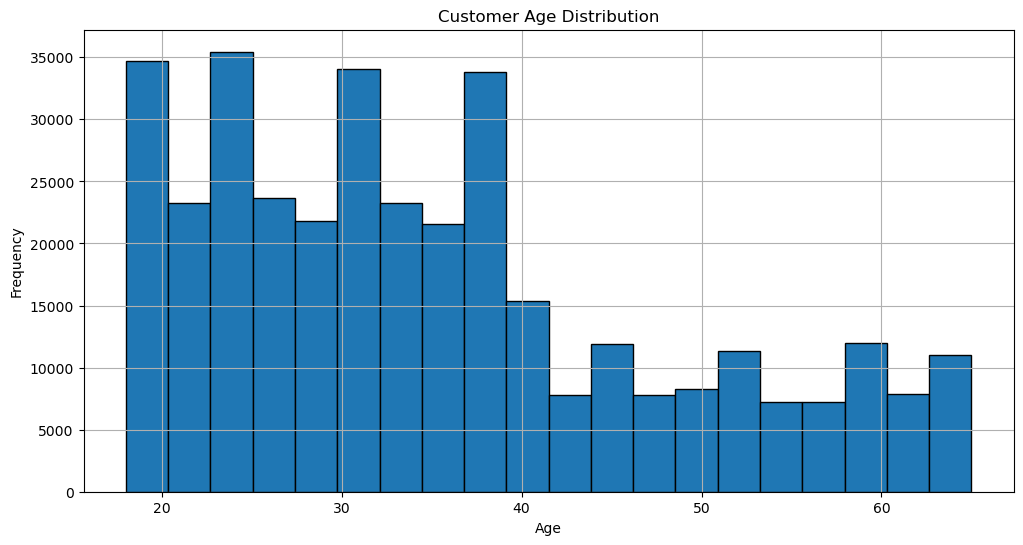

In [11]:
# Customer demographics: Age distribution
plt.figure(figsize=(12, 6))
master_data['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

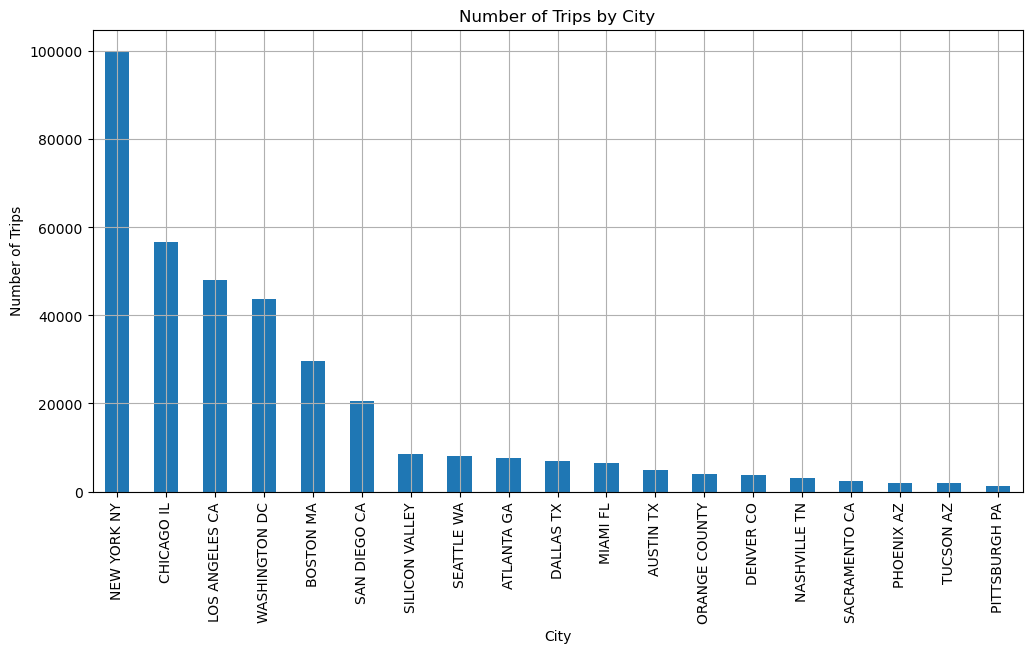

In [12]:
# City-wise analysis: Number of trips per city
plt.figure(figsize=(12, 6))
master_data['City'].value_counts().plot(kind='bar')
plt.title('Number of Trips by City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

In [13]:
# Extract month and year from the Date of Travel for seasonality analysis
master_data['Month'] = master_data['Date of Travel'].dt.month
master_data['Year'] = master_data['Date of Travel'].dt.year

In [14]:
# Group by year and month to find the number of trips per month
trips_per_month = master_data.groupby(['Year', 'Month']).size().reset_index(name='Number of Trips')

In [15]:
# Pivot the data for better visualization
trips_per_month_pivot = trips_per_month.pivot(index='Month', columns='Year', values='Number of Trips')

<Figure size 1200x600 with 0 Axes>

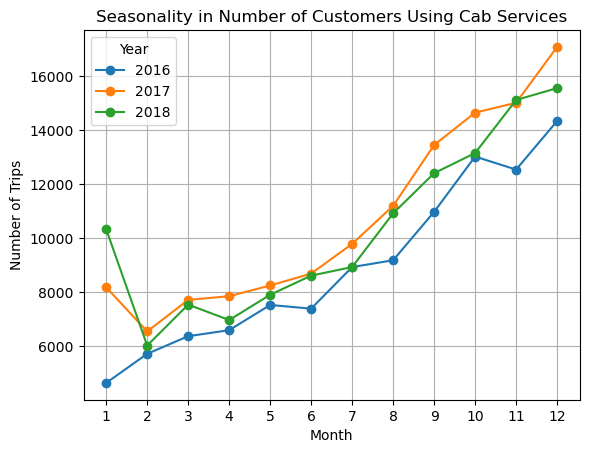

In [16]:
# Plotting the seasonality in the number of customers
plt.figure(figsize=(12, 6))
trips_per_month_pivot.plot(kind='line', marker='o')
plt.title('Seasonality in Number of Customers Using Cab Services')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year')
plt.show()

In [17]:
# Group by company and date to find the number of trips per company over time
company_performance = master_data.groupby(['Date of Travel', 'Company']).size().reset_index(name='Number of Trips')

In [18]:
# Pivot the data for better visualization
company_performance_pivot = company_performance.pivot(index='Date of Travel', columns='Company', values='Number of Trips')

<Figure size 1200x600 with 0 Axes>

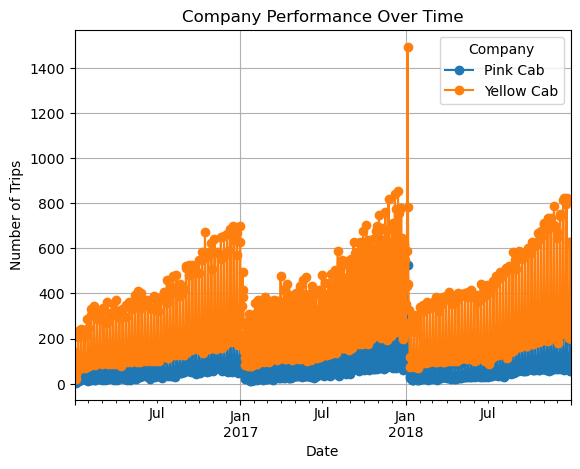

In [19]:
# Plotting the number of trips over time for each company
plt.figure(figsize=(12, 6))
company_performance_pivot.plot(kind='line', marker='o')
plt.title('Company Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.legend(title='Company')
plt.show()

In [20]:
# Calculate profit margin for each trip
master_data['Profit Margin'] = master_data['Price Charged'] - master_data['Cost of Trip']

In [21]:
# Group by date to find the total number of trips and total profit margin per day
profit_analysis = master_data.groupby('Date of Travel').agg({
    'Transaction ID': 'count',
    'Profit Margin': 'sum'
}).rename(columns={'Transaction ID': 'Number of Trips'})

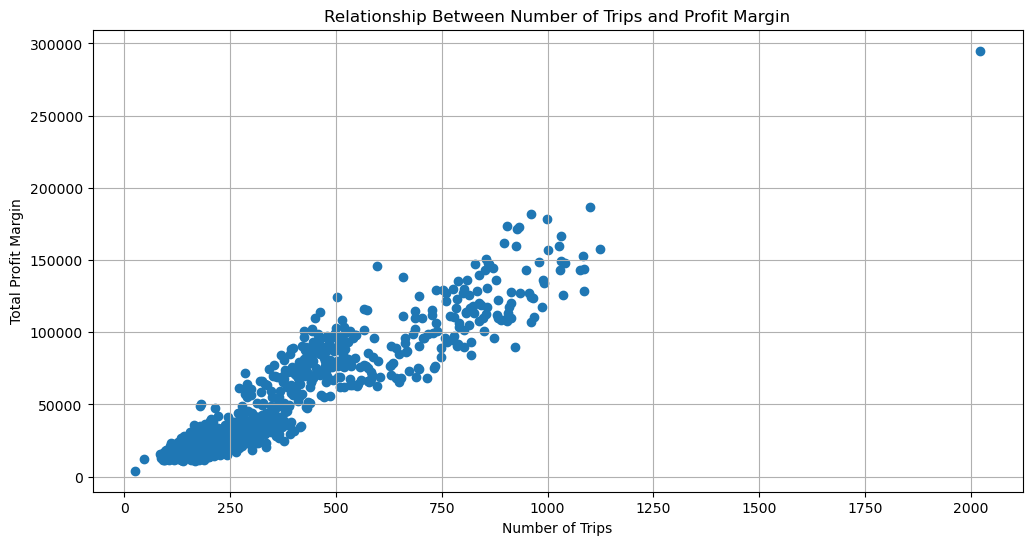

In [22]:
# Plotting the relationship between number of trips and total profit margin
plt.figure(figsize=(12, 6))
plt.scatter(profit_analysis['Number of Trips'], profit_analysis['Profit Margin'])
plt.title('Relationship Between Number of Trips and Profit Margin')
plt.xlabel('Number of Trips')
plt.ylabel('Total Profit Margin')
plt.grid(True)
plt.show()

In [23]:
# Analyzing customer segments based on age, income, and gender
customer_segments = master_data.groupby(['Gender', 'Age', 'Income (USD/Month)']).size().reset_index(name='Number of Trips')

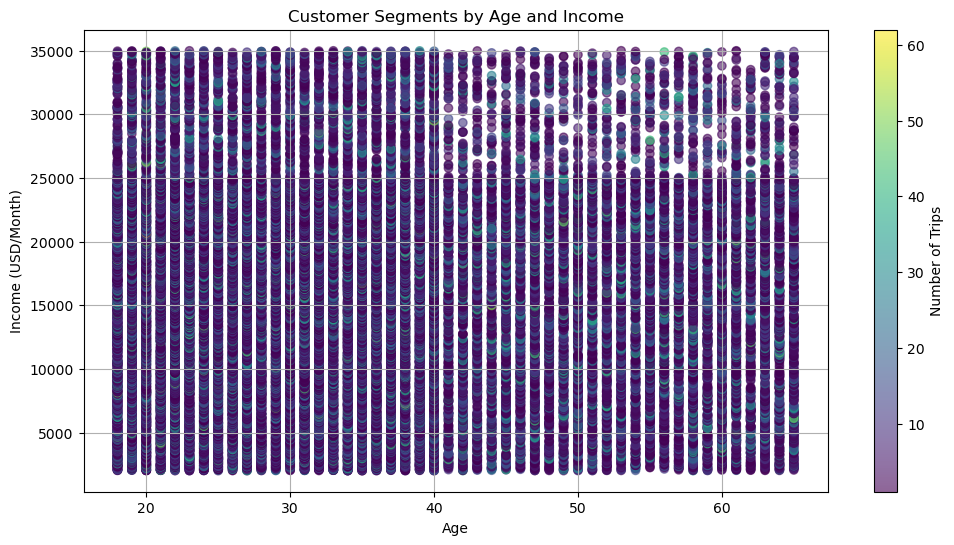

In [24]:
# Plotting the distribution of customer segments by age and gender
plt.figure(figsize=(12, 6))
plt.scatter(customer_segments['Age'], customer_segments['Income (USD/Month)'], c=customer_segments['Number of Trips'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Number of Trips')
plt.title('Customer Segments by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.grid(True)
plt.show()

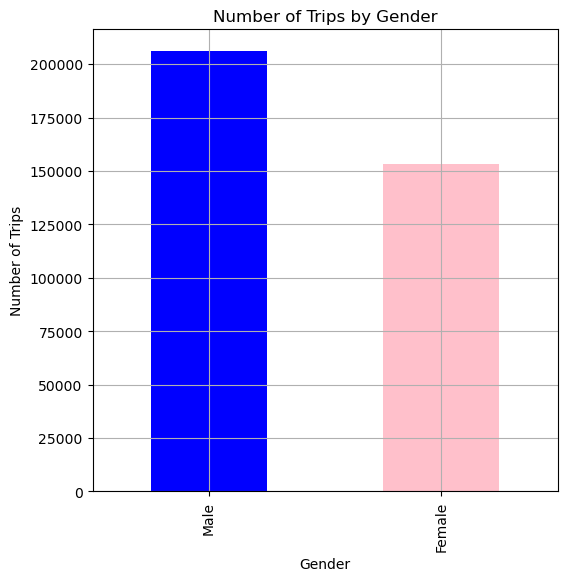

In [25]:
# Plotting the number of trips by gender
plt.figure(figsize=(6, 6))
master_data['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Trips by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

In [26]:
# Group by city to find the number of trips, total revenue, and total cost per city
city_analysis = master_data.groupby('City').agg({
    'Transaction ID': 'count',
    'Price Charged': 'sum',
    'Cost of Trip': 'sum'
}).rename(columns={
    'Transaction ID': 'Number of Trips',
    'Price Charged': 'Total Revenue',
    'Cost of Trip': 'Total Cost'
})

In [27]:
# Calculate profit margin for each city
city_analysis['Profit Margin'] = city_analysis['Total Revenue'] - city_analysis['Total Cost']

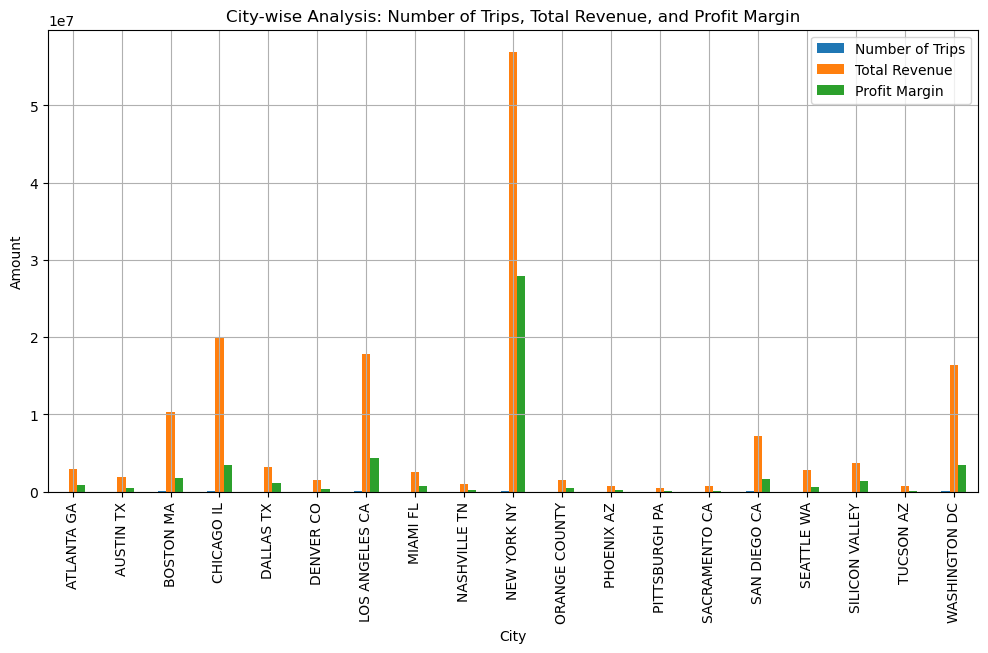

In [28]:
# Plotting the number of trips, total revenue, and profit margin by city
fig, ax1 = plt.subplots(figsize=(12, 6))

city_analysis[['Number of Trips', 'Total Revenue', 'Profit Margin']].plot(kind='bar', ax=ax1)
ax1.set_title('City-wise Analysis: Number of Trips, Total Revenue, and Profit Margin')
ax1.set_xlabel('City')
ax1.set_ylabel('Amount')
ax1.grid(True)

plt.show()

In [29]:
# Fetch US holiday data for the relevant years (2016-2018)
us_holidays = pd.DataFrame({
    'Date': pd.to_datetime([
        '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10',
        '2016-11-11', '2016-11-24', '2016-12-25', '2017-01-01', '2017-01-16', '2017-02-20', '2017-05-29',
        '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-11', '2017-11-23', '2017-12-25', '2018-01-01',
        '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-11',
        '2018-11-22', '2018-12-25'
    ]),
    'Holiday': [
        'New Year\'s Day', 'Martin Luther King Jr. Day', 'Presidents\' Day', 'Memorial Day', 'Independence Day',
        'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day', 'New Year\'s Day',
        'Martin Luther King Jr. Day', 'Presidents\' Day', 'Memorial Day', 'Independence Day', 'Labor Day',
        'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day', 'New Year\'s Day',
        'Martin Luther King Jr. Day', 'Presidents\' Day', 'Memorial Day', 'Independence Day', 'Labor Day',
        'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day'
    ]
})

In [30]:
# Merge the master dataset with holiday data
master_data_with_holidays = pd.merge(master_data, us_holidays, left_on='Date of Travel', right_on='Date', how='left')

In [31]:
# Analyze cab usage around holidays
holiday_analysis = master_data_with_holidays.groupby(['Holiday', 'Date of Travel']).size().reset_index(name='Number of Trips')

In [34]:
# Plotting the number of trips around holidays
plt.figure

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>